<a href="https://colab.research.google.com/github/hhelbock/Research-Project-/blob/main/Transformer_for_SOH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dataset from kaggle

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("programmer3/lithium-ion-battery-degradation-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'lithium-ion-battery-degradation-dataset' dataset.
Path to dataset files: /kaggle/input/lithium-ion-battery-degradation-dataset


Import dataset from local kaggle file as dataframe

In [3]:
import pandas as pd
import numpy as np
df_all=pd.read_csv(path+'/Battery_dataset.csv')
df_all.head()

,battery_id,cycle,chI,chV,chT,disI,disV,disT,BCt,SOH,RUL
0,B5,1,1.440147,4.254682,23.988733,1.894407,3.273523,32.980834,1.986196,99.309790,219
1,B5,2,1.416595,4.159825,25.665347,1.829949,4.038741,32.257920,1.986240,99.311985,218
2,B5,3,1.420272,4.276323,25.407910,1.942105,3.214433,35.134801,1.984252,99.212608,217
3,B5,4,1.337680,4.236697,27.069757,2.073577,3.134529,32.082988,1.969236,98.461812,216
4,B5,5,1.263946,4.142791,26.478353,2.049885,3.729341,32.483154,1.974862,98.743106,215


Separating df by battery_ID

In [4]:
df_B5=df_all.loc[df_all['battery_id']=='B5']
df_B6=df_all.loc[df_all['battery_id']=='B6']
df_B7=df_all.loc[df_all['battery_id']=='B7']
print(df_B5.head())



  battery_id  cycle       chI       chV        chT      disI      disV  \
0         B5      1  1.440147  4.254682  23.988733  1.894407  3.273523   
1         B5      2  1.416595  4.159825  25.665347  1.829949  4.038741   
2         B5      3  1.420272  4.276323  25.407910  1.942105  3.214433   
3         B5      4  1.337680  4.236697  27.069757  2.073577  3.134529   
4         B5      5  1.263946  4.142791  26.478353  2.049885  3.729341   

        disT       BCt        SOH  RUL  
0  32.980834  1.986196  99.309790  219  
1  32.257920  1.986240  99.311985  218  
2  35.134801  1.984252  99.212608  217  
3  32.082988  1.969236  98.461812  216  
4  32.483154  1.974862  98.743106  215  


separate into train and test


In [5]:
#relevant features for prediction
features=['chI','chV','chT','disI','disV','disT','BCt']
target=['SOH']
#going to use different battery ids for train validation and test
B5_train=df_B5[features].to_numpy()
B5_target=df_B5[target].to_numpy()
B6_validation=df_B6[features].to_numpy()
B6_target=df_B6[target].to_numpy()
B7_test=df_B7[features].to_numpy()
B7_target=df_B7[target].to_numpy()


Scaling input data

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
B5_train_scaled=scaler.fit_transform(B5_train)
B6_validation_scaled=scaler.transform(B6_validation)
B7_test_scaled=scaler.transform(B7_test)

convert to tensors

In [7]:
import torch
B5_train_scaled=torch.tensor(B5_train_scaled,dtype=torch.float32)
B5_target=torch.tensor(B5_target,dtype=torch.float32)
B6_validation_scaled=torch.tensor(B6_validation_scaled,dtype=torch.float32)
B6_target=torch.tensor(B6_target,dtype=torch.float32)
B7_test_scaled=torch.tensor(B7_test_scaled,dtype=torch.float32)
B7_target=torch.tensor(B7_target,dtype=torch.float32)
B5_train_scaled=B5_train_scaled[:210,:]
B5_target=B5_target[:210,:]
B6_validation_scaled=B6_validation_scaled[:210,:]
B6_target=B6_target[:210,:]
B7_test_scaled=B7_test_scaled[:210,:]
B7_target=B7_target[:210,:]
print(B5_train_scaled.shape)
print(B6_validation_scaled.shape)
print(B7_test_scaled.shape)


torch.Size([210, 7])
torch.Size([210, 7])
torch.Size([210, 7])


In [8]:
B5_train_scaled=B5_train_scaled.reshape(1,210,7)
B6_validation_scaled=B6_validation_scaled.reshape(1,210,7)
B7_test_scaled=B7_test_scaled.reshape(1,210,7)



In [9]:
target_scaler=StandardScaler()
B5_target_scaled=target_scaler.fit_transform(B5_target)
B6_target_scaled=target_scaler.transform(B6_target)
B7_target_scaled=target_scaler.transform(B7_target)
B5_target_scaled=torch.tensor(B5_target_scaled,dtype=torch.float32)
B6_target_scaled=torch.tensor(B6_target_scaled,dtype=torch.float32)
B7_target_scaled=torch.tensor(B7_target_scaled,dtype=torch.float32)
B5_target_scaled=B5_target_scaled.flatten()
B6_target_scaled=B6_target_scaled.flatten()
B7_target_scaled=B7_target_scaled.flatten()
print(B5_target_scaled.shape)
print(B6_target_scaled.shape)
print(B7_target_scaled.shape)
print(B5_target_scaled)


torch.Size([210])
torch.Size([210])
torch.Size([210])
tensor([ 1.6951e+00,  1.6953e+00,  1.6887e+00,  1.6391e+00,  1.6577e+00,
         1.6624e+00,  1.6274e+00,  1.6059e+00,  1.6004e+00,  1.5795e+00,
         1.5420e+00,  1.5619e+00,  1.5372e+00,  1.5227e+00,  1.5066e+00,
         1.4839e+00,  1.4652e+00,  1.4494e+00,  1.4349e+00,  1.4094e+00,
         1.3857e+00,  1.3705e+00,  1.3642e+00,  1.3565e+00,  1.3389e+00,
         1.3083e+00,  1.3155e+00,  1.2818e+00,  1.2670e+00,  1.2711e+00,
         1.2123e+00,  1.2258e+00,  1.1922e+00,  1.1717e+00,  1.1608e+00,
         1.1630e+00,  1.1169e+00,  1.1151e+00,  1.1125e+00,  1.0757e+00,
         1.0543e+00,  1.0346e+00,  9.9785e-01,  9.9582e-01,  9.6559e-01,
         9.6401e-01,  9.6286e-01,  9.7980e-01,  9.4835e-01,  9.0906e-01,
         8.8176e-01,  8.7305e-01,  8.4928e-01,  8.5700e-01,  8.1940e-01,
         7.9615e-01,  7.9617e-01,  7.6301e-01,  7.5353e-01,  7.8168e-01,
         7.2330e-01,  7.3805e-01,  6.9389e-01,  6.5812e-01,  6.6382e-0

Used Pytorch documentation for positional encoding

In [10]:
import torch
from torch import nn
import math

class Denoiseautoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder=nn.Sequential(nn.Linear(7,70),nn.ReLU(),nn.Linear(70,21),nn.ReLU())
    self.decoder=nn.Sequential(nn.Linear(21,35),nn.ReLU(),nn.Linear(35,7))
  def forward(self,x):
    x=self.encoder(x)
    x=self.decoder(x)
    return x

class PositionalEncoding(nn.Module):
  def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
    super().__init__()
    self.dropout = nn.Dropout(p=dropout)

    position = torch.arange(max_len).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
    pe = torch.zeros(max_len, 1, d_model)
    pe[:, 0, 0::2] = torch.sin(position * div_term)
    # Fix: Slice div_term for odd indices to match the target dimension
    pe[:, 0, 1::2] = torch.cos(position * div_term[:, :pe[:, 0, 1::2].shape[-1]] if div_term.dim() > 1 else div_term[:pe[:, 0, 1::2].shape[-1]])
    self.register_buffer('pe', pe)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    x = x + self.pe[:x.size(0)]
    return self.dropout(x)




class BatteryTransformer(nn.Module):
  def __init__(self):
    super().__init__()
    self.DAE=Denoiseautoencoder()
    self.positional_encoding=PositionalEncoding(d_model=7,dropout=0.1,max_len=210)
    self.transformerlayer=nn.TransformerEncoderLayer(d_model=7,nhead=7)
    self.linear=nn.Linear(in_features=7,out_features=1)
  def forward(self,x):
    x=self.DAE(x)
    x=self.positional_encoding(x)
    x=self.transformerlayer(x)
    x=self.linear(x)
    x=x.squeeze(0)
    x=x.flatten()
    return x

In [11]:
from torch import optim

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

model=BatteryTransformer().to(device)
loss_fn=nn.MSELoss()

optimizer=optim.Adam(params=model.parameters(),lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=750, gamma=0.1)
num_epochs=1500

# Move tensors to the device
B5_train_scaled = B5_train_scaled.to(device)
B5_target_scaled = B5_target_scaled.to(device)
B6_validation_scaled = B6_validation_scaled.to(device)
B6_target_scaled = B6_target_scaled.to(device)


for epoch in range(num_epochs):
  model.train()
  y_pred=model(B5_train_scaled)
  loss=loss_fn(y_pred,B5_target_scaled)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()
  scheduler.step()
  if epoch%100==0:
    print(f'Epoch: {epoch+1} Loss: {loss.item()}')

Using device: cuda
Epoch: 1 Loss: 1.485768437385559
Epoch: 101 Loss: 0.05977813899517059
Epoch: 201 Loss: 0.02336953952908516
Epoch: 301 Loss: 0.013439957052469254
Epoch: 401 Loss: 0.008473534137010574
Epoch: 501 Loss: 0.00950250681489706
Epoch: 601 Loss: 0.006881122477352619
Epoch: 701 Loss: 0.0060563902370631695
Epoch: 801 Loss: 0.007355938199907541
Epoch: 901 Loss: 0.00654713436961174
Epoch: 1001 Loss: 0.007570532616227865
Epoch: 1101 Loss: 0.00496441638097167
Epoch: 1201 Loss: 0.0036676868330687284
Epoch: 1301 Loss: 0.005833467468619347
Epoch: 1401 Loss: 0.005269549321383238


In [12]:
from sklearn.metrics import accuracy_score

# Ensure validation data is on the correct device
B6_validation_scaled = B6_validation_scaled.to(device)
B6_target_scaled = B6_target_scaled.to(device)

model.eval()
with torch.no_grad(): # Disable gradient calculation for evaluation
    B6_pred=model(B6_validation_scaled)

correct=0
# Move predictions and targets to CPU for comparison and item retrieval if needed
# or keep them on GPU for comparison and then move to CPU for printing.
B6_pred_cpu = B6_pred.cpu()
B6_target_scaled_cpu = B6_target_scaled.cpu()

for i in range(len(B6_target_scaled_cpu)):
    if (abs(B6_pred[i].item()-B6_target_scaled[i].item()))/B6_target_scaled[i] < 0.1:
        correct+=1
    # Optionally print all predictions and actuals to see the difference
    # print(f"Predicted: {B6_pred_cpu[i].item()} Actual: {B6_target_scaled_cpu[i].item()}")

print(f"Accuracy (within 0.1 tolerance): {correct/len(B6_target_scaled_cpu)}")


Accuracy (within 0.1 tolerance): 0.8904761904761904


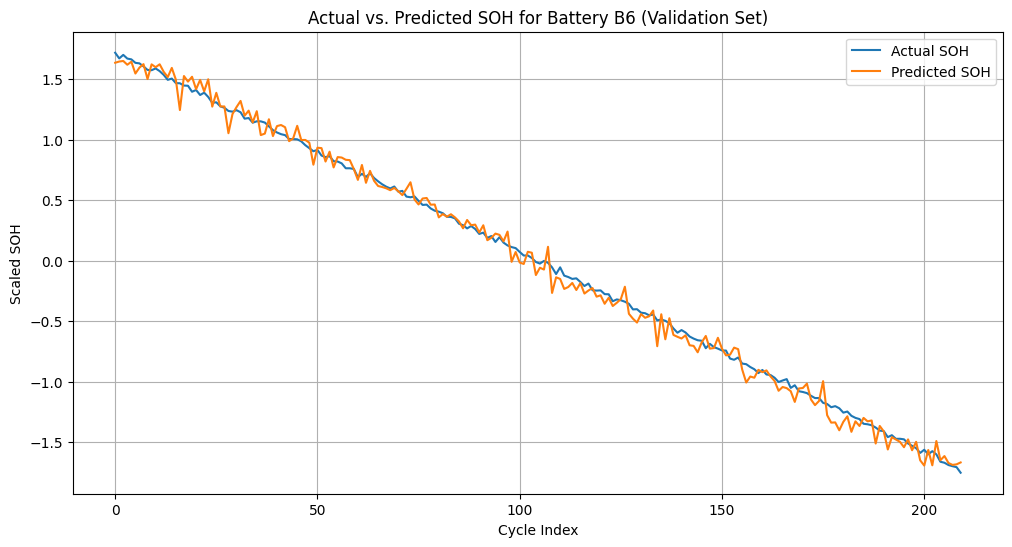

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(B6_target_scaled_cpu.numpy(), label='Actual SOH')
plt.plot(B6_pred_cpu.numpy(), label='Predicted SOH')
plt.title('Actual vs. Predicted SOH for Battery B6 (Validation Set)')
plt.xlabel('Cycle Index')
plt.ylabel('Scaled SOH')
plt.legend()
plt.grid(True)
plt.show()

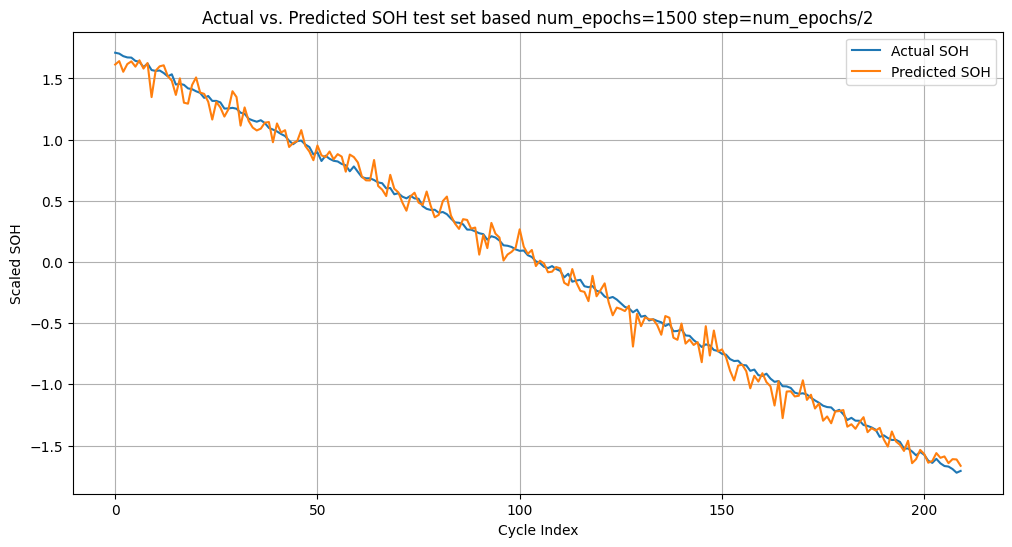

In [17]:
from sklearn.metrics import accuracy_score

# Ensure validation data is on the correct device
B7_test_scaled = B7_test_scaled.to(device)
B7_target_scaled = B7_target_scaled.to(device)
model.eval()
with torch.no_grad():
    B7_pred=model(B7_test_scaled)
B7_pred_cpu = B7_pred.cpu()
B7_target_scaled_cpu = B7_target_scaled.cpu()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(B7_target_scaled_cpu.numpy(), label='Actual SOH')
plt.plot(B7_pred_cpu.numpy(), label='Predicted SOH')
plt.title('Actual vs. Predicted SOH test set based num_epochs=1500 step=num_epochs/2')
plt.xlabel('Cycle Index')
plt.ylabel('Scaled SOH')
plt.legend()
plt.grid(True)
plt.show()


MAE mean absolute error

In [18]:
total=0


for i in range(len(B7_target_scaled_cpu)):
    total+=abs(B7_target_scaled[i].item()-B7_pred[i].item())
MAE=total/len(B7_target_scaled_cpu)
print('Mean Absolute error: ',MAE)


Mean Absolute error:  0.057284494420690904


Relative Error

In [19]:
RE=0
std, mean=torch.std_mean(B7_target)

for i in range(len(B7_target_scaled_cpu)):
    Rpred=(B7_pred[i].item()/std)*mean
    Ractual=(B7_target_scaled[i].item()/std)*mean
    RE+=abs(Rpred-Ractual)/Ractual

RE=RE/len(B7_target_scaled_cpu)

print('Relative Error: ',RE)

Relative Error:  tensor(0.0175)


Root Mean Square Error

In [20]:
RMSE=0
for i in range(len(B7_target_scaled_cpu)):
    RMSE+=(B7_target_scaled[i].item()-B7_pred[i].item())**2
RMSE=(RMSE/len(B7_target_scaled_cpu))**(0.5)
print('Root Mean Square Error: ',RMSE)


Root Mean Square Error:  0.0749243090194512
